In [3]:
from simulation import *
from aesthetics import *
from models import *
from data import *

import glob
import os as os
import re as re
import pandas as pd

%reload_ext autoreload
%autoreload 2
%matplotlib inline
mpl.rc('text', usetex=True)

# Read in results from the torsion scan

In [2]:
df = pd.read_pickle('adk-residues-by-flux.pickle')

In [3]:
print('The total number of torsions is: {}'.format(len(df)))
print('The number of torsions with flux > 1 is: {}'.format(np.sum(df['Flux'].abs() > 1)))
print('The number of torsions with maximum load > 0.01 is: {}'.format(np.sum(df['Max load'].abs() > 0.01)))
print('The number of torsions with maximum power > 0.01 is: {}'.format(np.sum(df['Max power'].abs() > 0.01)))

The total number of torsions is: 903
The number of torsions with flux > 1 is: 1
The number of torsions with maximum load > 0.01 is: 4
The number of torsions with maximum power > 0.01 is: 14


In [5]:
df[df['File'] == 'psiSER41']

,File,Flux,Flux std,Intersurface flux,Max load,Max power,ResID
864,psiSER41,0.054278,0.000045,0.010807,1.046233,15.686298,41


# Read in results from the concentration scan, which will include the results of the torsion scan

In [8]:
concentration_scan = pd.read_pickle('adk-concentration-scan.pickle')
concentration_scan = concentration_scan.round({'Concentration': 2,})
concentration_scan[['ResID']] = concentration_scan[['ResID']].apply(pd.to_numeric)
df = concentration_scan

In [9]:
df[df['File'] == 'psiSER41']

,Concentration,File,Flux,Intersurface flux,Load @ concentration,Power @ concentration,ResID
864,0.0,psiSER41,89.487837,17.811964,1.185388,52.786372,41
1767,0.2,psiSER41,89.292813,17.773537,1.184551,52.668507,41
2670,0.4,psiSER41,88.966782,17.709009,1.182265,52.470806,41
3573,0.6,psiSER41,88.441767,17.604563,1.182572,52.152939,41
4476,0.8,psiSER41,87.616816,17.440561,1.183806,51.651993,41
5379,1.0,psiSER41,86.335355,17.185521,1.182745,50.873197,41
6282,1.2,psiSER41,84.375871,16.795585,1.179889,49.681294,41
7185,1.4,psiSER41,81.445185,16.212176,1.175330,47.895755,41
8088,1.6,psiSER41,77.195402,15.366203,1.171668,45.299324,41
8991,1.8,psiSER41,71.297630,14.192381,0.000008,0.000553,41


C                         +1.00e+06  second**-1
D                         +3.00e+12  degrees**2 second**-1
k_{cat}                   +3.12e+02  second**-1
[S]                       +1.00e-03  M         
dt                        +1.00e-12  second**-1
-----------------         ---------  --------- 
Intrasurface flux         +1.75e+01  cycle second**-1
Intersurface flux         +2.46e-05  cycle second**-1


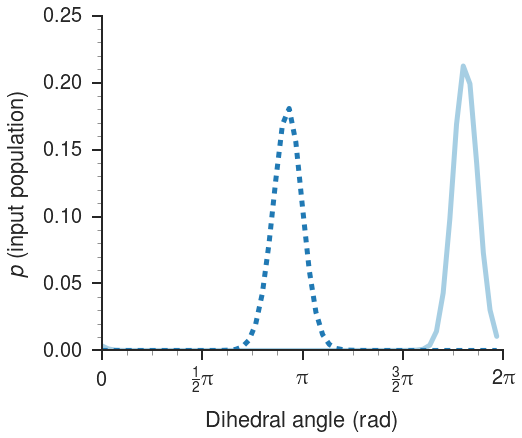

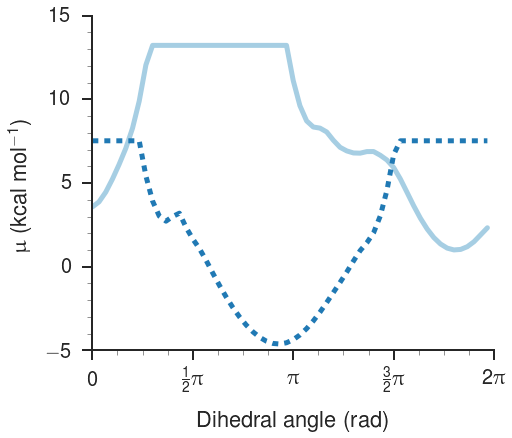

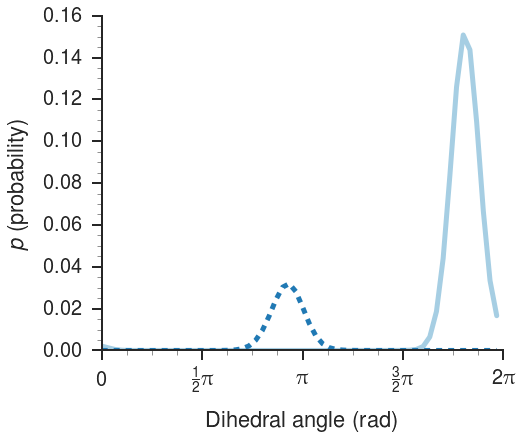

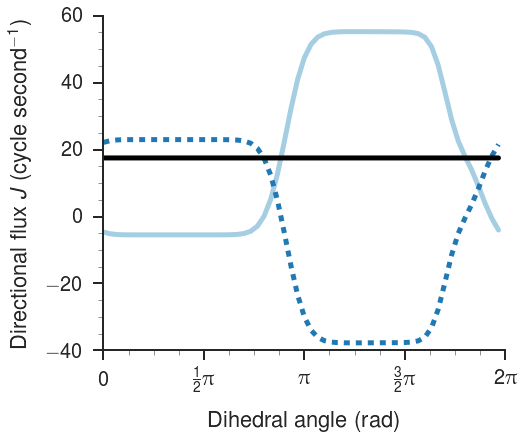

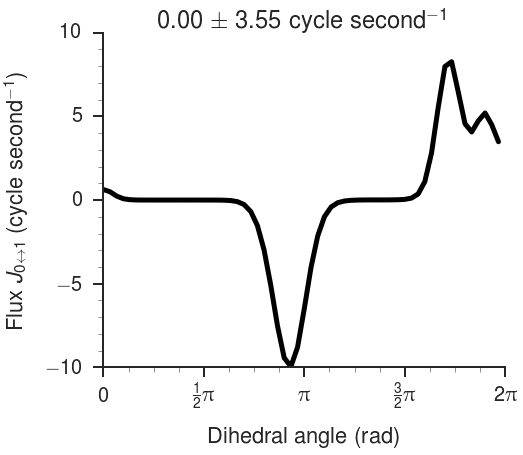

In [5]:
this = simulation(data_source='adk_md_data')
this.name = 'psiSER41'
this.cSubstrate = 10**-3
this.simulate(plot=True)

# Power as a function of concentration for psiSER41

In [35]:
concentrations = np.arange(0, 6, 0.2)
loads = np.arange(0.001, 2, 0.05)
cmap = sns.cubehelix_palette(len(concentrations))

# This little hack helps with the colorbar
all_fluxes = np.zeros((len(concentrations), len(loads)))
all_powers = np.zeros((len(concentrations), len(loads)))
all_loads = np.zeros((len(concentrations), len(loads)))



psiSER41 = pd.DataFrame()

for concentration in concentrations:
    print('Concentration = {}'.format(concentration))
    name = 'psiSER41'
    cSubstrate = 10**-concentration
    this = simulation(data_source = 'adk_md_data')
    this.name = name
    this.cSubstrate = cSubstrate
    fluxes = []
    powers = []
    for load in loads:
        this.load = True
        this.load_slope = load
        this.simulate()
        
        all_fluxes[np.where(concentrations == concentration)[0], 
                  np.where(loads == load)[0]] = np.mean(this.flux_u + this.flux_b)
        
        all_loads[np.where(concentrations == concentration)[0], 
           np.where(loads == load)[0]] = load

        
        all_powers[np.where(concentrations == concentration)[0], 
                  np.where(loads == load)[0]] = load * np.mean(this.flux_u + this.flux_b)
        
        psiSER41 = psiSER41.append(pd.DataFrame({'Flux': np.mean(this.flux_u + this.flux_b),
                        'Power': -load * np.mean(this.flux_u + this.flux_b),
                        'Load': -load,


                        'Concentration' : 10**-concentration,
                        }, index=[0]), ignore_index=True)

Concentration = 0.0


/mnt/639f049e-1c5c-4215-bb93-e396da93aa2b/projects/nonequilibrium/code/SG-model-v2/simulation.py:317: ComplexWarning: Casting complex values to real discards the imaginary part
  ss = abs(eigenvectors[:, self.eigenvalues.argmax()].astype(float))


Concentration = 0.2
Concentration = 0.4
Concentration = 0.6000000000000001
Concentration = 0.8
Concentration = 1.0
Concentration = 1.2000000000000002
Concentration = 1.4000000000000001
Concentration = 1.6
Concentration = 1.8
Concentration = 2.0
Concentration = 2.2
Concentration = 2.4000000000000004
Concentration = 2.6
Concentration = 2.8000000000000003
Concentration = 3.0
Concentration = 3.2
Concentration = 3.4000000000000004
Concentration = 3.6
Concentration = 3.8000000000000003
Concentration = 4.0
Concentration = 4.2
Concentration = 4.4
Concentration = 4.6000000000000005
Concentration = 4.800000000000001
Concentration = 5.0
Concentration = 5.2
Concentration = 5.4
Concentration = 5.6000000000000005
Concentration = 5.800000000000001


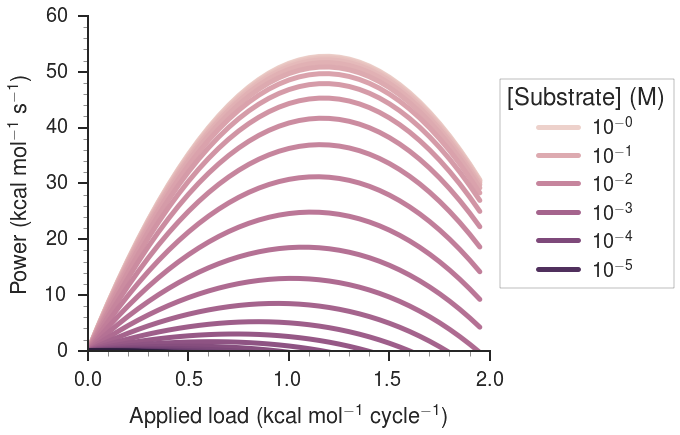

In [39]:
fig = plt.figure(figsize=(6 * 1.2, 6))
gs = GridSpec(1, 1, wspace=0.2, hspace=0.5)
ax = plt.subplot(gs[0, 0])

for i in range(len(concentrations)):
    
#     if concentrations[i] in concentrations[::5]:
#         ax.plot(all_fluxes[i], all_powers[i], c=cmap[i], label='$10^{{{0:0.0f} }}$'.format(-1*concentrations[i]))
#     else:
#         ax.plot(all_fluxes[i], all_powers[i], c=cmap[i])

    if concentrations[i] in concentrations[::5]:
        ax.plot(all_loads[i], all_powers[i], c=cmap[i], label='$10^{{{0:0.0f} }}$'.format(-1*concentrations[i]))
    else:
        ax.plot(all_loads[i], all_powers[i], c=cmap[i])




ax.set_ylim([0, 60])
ax.set_xlim([0, 2])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, title='[Substrate] (M)')
ax.set_ylabel(r'Power (kcal mol$^{{-1}}$ s$^{{-1}}$)')
ax.set_xlabel('Applied load (kcal mol$^{{-1}}$ cycle$^{{-1}}$)')
aesthetics.paper_plot(fig)


# Enzyme velocity

In [11]:
concentrations = np.arange(0, 6, 0.2)
loads = np.arange(0.001, 2, 0.05)
cmap = sns.cubehelix_palette(len(concentrations))

# This little hack helps with the colorbar
all_fluxes = np.zeros((len(concentrations), len(loads)))
all_powers = np.zeros((len(concentrations), len(loads)))
all_velocities = np.zeros((len(concentrations), len(loads)))

psiSER41 = pd.DataFrame()

for concentration in concentrations:
    print('Concentration = {}'.format(concentration))
    name = 'psiSER41'
    cSubstrate = 10**-concentration
    this = simulation(data_source = 'adk_md_data')
    this.name = name
    this.cSubstrate = cSubstrate
    fluxes = []
    powers = []
    for load in loads:
        this.load = True
        this.load_slope = load
        this.simulate()
        
        all_fluxes[np.where(concentrations == concentration)[0], 
                  np.where(loads == load)[0]] = np.mean(this.flux_u + this.flux_b)
        all_powers[np.where(concentrations == concentration)[0], 
                  np.where(loads == load)[0]] = load * np.mean(this.flux_u + this.flux_b)
        all_velocities[np.where(concentrations == concentration)[0], 
                  np.where(loads == load)[0]] = np.sum(this.ss[this.bins:2*this.bins] * this.catalytic_rate)
        
        psiSER41 = psiSER41.append(pd.DataFrame({'Flux': np.mean(this.flux_u + this.flux_b),
                        'Power': -load * np.mean(this.flux_u + this.flux_b),
                        'Concentration' : 10**-concentration,
                        'Enzyme velocity': np.sum(this.ss[this.bins:2*this.bins] * this.catalytic_rate),
                        'Directional flux' : np.mean(this.flux_u + this.flux_b)
                        }, index=[0]), ignore_index=True)

Concentration = 0.0


/mnt/639f049e-1c5c-4215-bb93-e396da93aa2b/projects/nonequilibrium/code/SG-model-v2/simulation.py:317: ComplexWarning: Casting complex values to real discards the imaginary part
  ss = abs(eigenvectors[:, self.eigenvalues.argmax()].astype(float))


Concentration = 0.2
Concentration = 0.4
Concentration = 0.6000000000000001
Concentration = 0.8
Concentration = 1.0
Concentration = 1.2000000000000002
Concentration = 1.4000000000000001
Concentration = 1.6
Concentration = 1.8
Concentration = 2.0
Concentration = 2.2
Concentration = 2.4000000000000004
Concentration = 2.6
Concentration = 2.8000000000000003
Concentration = 3.0
Concentration = 3.2
Concentration = 3.4000000000000004
Concentration = 3.6
Concentration = 3.8000000000000003
Concentration = 4.0
Concentration = 4.2
Concentration = 4.4
Concentration = 4.6000000000000005
Concentration = 4.800000000000001
Concentration = 5.0
Concentration = 5.2
Concentration = 5.4
Concentration = 5.6000000000000005
Concentration = 5.800000000000001


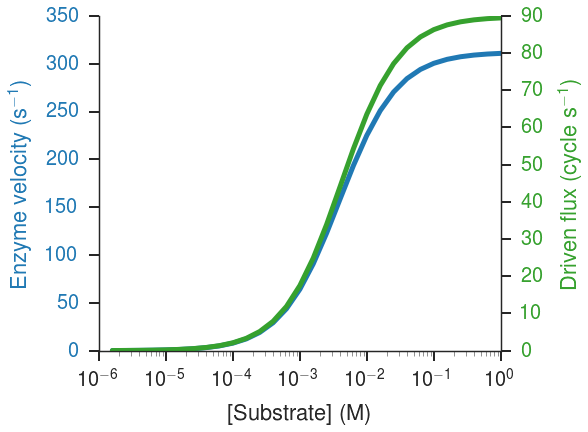

In [33]:
fig = plt.figure(figsize=(6 * 1.2, 6))
gs = GridSpec(1, 1, wspace=0.2, hspace=0.5)
ax1 = plt.subplot(gs[0, 0])
cmap = sns.color_palette("Paired", 10)

ax1.plot([10**-i for i in concentrations], np.max(all_velocities, axis=1), c=cmap[1])


ax2 = ax1.twinx()
ax2.plot([10**-i for i in concentrations], np.max(all_fluxes, axis=1), c=cmap[3])
ax2.set_ylabel('Driven flux (cycle s$^{{-1}}$)', color=cmap[3])

ax1.set_xscale('log')
ax1.set_ylabel(r'Enzyme velocity (s$^{{-1}}$)', color=cmap[1])
for tl in ax1.get_yticklabels():
    tl.set_color(cmap[1])
for tl in ax2.get_yticklabels():
    tl.set_color(cmap[3])

ax1.set_xlabel('[Substrate] (M)')
for ax in fig.axes:
    # Increase padding
    ax.tick_params(which='major', direction='out', length=10, pad=10)
    ax.tick_params(which='minor', direction='out', length=5)
    # If plotting with pi, increase the x tick size specifically
    # ax.tick_params(axis='x', labelsize=40, pad=-10)
    # Increase tick thickness
    ax.xaxis.set_tick_params(width=2)
    ax.yaxis.set_tick_params(width=2)

    ax.xaxis.set_ticks_position('bottom')


    
    ax.spines["top"].set_visible(False)
    # Increase padding
    ax.xaxis.labelpad = 15
    ax.yaxis.labelpad = 15




In [5]:
concentrations = np.arange(-3, 5, 0.5)
fluxes = []
for concentration in concentrations:
    print('Concentration = {}'.format(concentration))
    name = 'psiSER41'
    cSubstrate = 10**-concentration
    this = simulation(data_source = 'adk_md_data')
    this.name = name
    this.cSubstrate = cSubstrate
    this.simulate()
    fluxes.append(np.mean(this.flux_u + this.flux_b))

Concentration = -3.0
Concentration = -2.5
Concentration = -2.0
Concentration = -1.5
Concentration = -1.0
Concentration = -0.5
Concentration = 0.0
Concentration = 0.5
Concentration = 1.0


/media/dslochower/data-beta/projects/nonequilibrium/code/SG-model-v2/simulation.py:397: ComplexWarning: Casting complex values to real discards the imaginary part
  ss = abs(eigenvectors[:, self.eigenvalues.argmax()].astype(float))


Concentration = 1.5
Concentration = 2.0
Concentration = 2.5
Concentration = 3.0
Concentration = 3.5
Concentration = 4.0
Concentration = 4.5


(0.001, 10000)

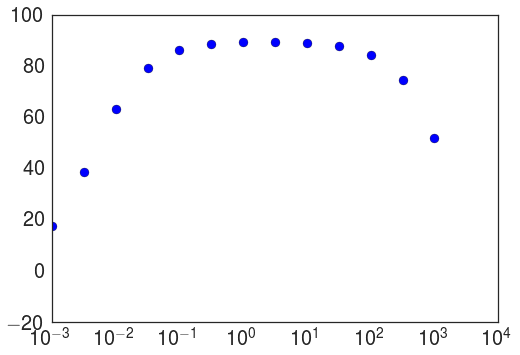

In [11]:
plt.scatter([10**-i for i in concentrations], fluxes, s=80)
plt.xscale('log')
plt.xlim([10**-3, 10**4])